## For the "Deep Learning using TensorFlow & Keras" course:

##### Author: Arta Khosravi


<br>
<div dir="auto" >
<p style='text-align: right;'>
فرض کنید دیتاستی به صورت زیر برای یک مساله رگرسیون دارید. برای این دیتاست مدل خطی بسازید و ستون y را بر اساس ورودی‌های X پیش‌بینی کنید. محاسبات را برای سه iteration بصورت دستی تکرار کنید و در نهایت معادله خط را بدست آورید. برای مقداردهی اولیه وزن‌ها می‌توانید از امکانات numpy.random استفاده کنید. برای محاسبه‌ی خطای پیش‌بینی از مقادیر واقعی یک بار از quadratic error و سپس از absolute error استفاده کنید و هر دو خط بدست آمده را روی داده رسم کنید.
</p>
</div>
<!-- <p>&nbsp;</p> -->
<p dir="ltr">(quadratic error : (prediction-target)^2)</p>
<p dir="ltr"><img src="https://maktabkhooneh.org/media/uploads/Screenshot_2022-03-08_160808.jpg" alt="" width="195" height="112" /><br />(absolute error : |prediction-target|)</p>

In [803]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
%matplotlib inline

In [805]:
df = pd.DataFrame({'X':[1.2,2.5,3.5],'Y':[8.5,9.2,10.1]})
df

,X,Y
0,1.2,8.5
1,2.5,9.2
2,3.5,10.1


- $Error$, $Loss$ or $Cost$ $Function$: $E(\theta)$ = $\frac{1}{2}$ $\sum\limits_{k=1}^M[t^k - \hat{y}^k]^2$
  <br>Note: $t$ is the true value/features, and $\hat{y}$ are the predicted values/features.
<!-- <br> -->
<!-- <br> -->
- $Quadratic$ $Error$ or $MSE$ = $\frac{1}{M}$ $\sum\limits_{k=1}^M[y_{true}^k - \hat{y}_{pred}^k]^2$

- $Absolute$ $Error$ or $MAE$ = $\frac{1}{M}$ $\sum\limits_{k=1}^M|y_{true}^k  - \hat{y}_{pred}^k|$

#### Finding Parameters that Minimize Errors:
- $The$ $gradiant$ $descent$ $method$: $\theta_j^{s+1}$ = $\theta_j^s - \gamma \frac{dE}{d\theta_j}$
  <br>Note: $s$ is step, $\gamma$ is learning rate, $E$ is the error, and $\theta$ is our value.

- $Weight$: $m_{s + 1}$ = $m_s -\gamma\dfrac{\partial E}{\partial m}$

  - for MSE: $\dfrac{\partial E}{\partial m}$ = $\frac{-2}{M}$ $X_i \sum[y_{i}-\hat{y}_i]$

  - for MAE: $\dfrac{\partial E}{\partial m}$ = $\frac{-1}{M}$ $\sum X_i sign(e_i)$
- $Bias$: $b_{s + 1}$ = $b_s - \gamma\dfrac{\partial E}{\partial b}$

  - for MSE: $\dfrac{\partial E}{\partial b}$ = $\frac{-2}{M}$ $\sum[y_{i}-\hat{y}_i]$

  - for MAE: $\dfrac{\partial E}{\partial m}$ = $\frac{-1}{M}$ $\sum sign(e_i)$
<!-- <br> -->


In [807]:
np.random.seed(42)
m_init = np.random.randn() #weight
b_init = np.random.randn() #bias
x = df['X'].to_numpy() #Features
t = df['Y'].to_numpy() #True values
learning_rate = 0.07 #Speculation
iteration = 3 #iterations
N = len(X)

In [809]:
def update_weights_MSE(m, b, X, Y, LR):
    dm = 0
    db = 0
    N = len(X)
    for i in range(N):
        dm += -2*X[i] * (Y[i] - (m*X[i] + b))
        db += -2*(Y[i] - (m*X[i] + b))
    m -= (dm / float(N)) * LR
    b -= (db / float(N)) * LR
    return m, b

new_m_MSE , new_b_MSE = update_weights_MSE(m_init, b_init, x, t, learning_rate)
new_m_MSE , new_b_MSE

(3.279961881689365, 1.0115300789143404)

In [811]:
def update_weights_MAE(m, b, X, Y, LR):
    dm = 0
    db = 0
    N = len(X)
    for i in range(N):
        dm += - X[i] * (Y[i] - (m*X[i] + b)) / abs(Y[i] - (m*X[i] + b))
        db += -(Y[i] - (m*X[i] + b)) / abs(Y[i] - (m*X[i] + b))
    m -= (dm / float(N)) * LR
    b -= (db / float(N)) * LR
    return m, b

new_m_MAE , new_b_MAE = update_weights_MAE(m, b, x, t, learning_rate)
new_m_MAE , new_b_MAE

(0.6647141530112327, -0.06826430117118465)

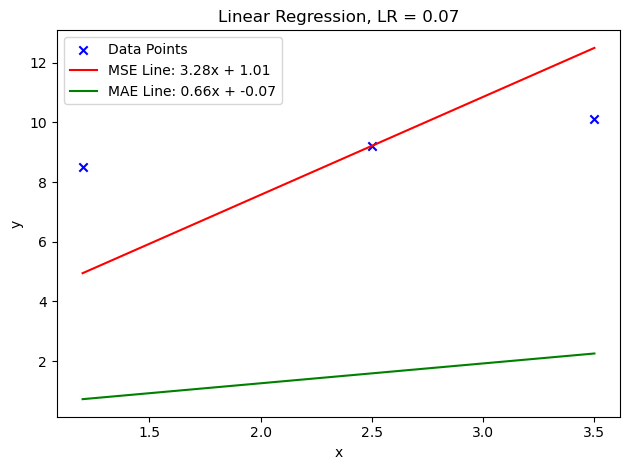

In [813]:
def pred(m , b , x):
    y = m * x + b
    return y

plt.scatter(x, t, color='blue', marker='x', label='Data Points')
plt.plot(x, pred(new_m_MSE,new_b_MSE,x), color='red', label='MSE Line: {}x + {}'.format(round(new_m_MSE,2),round(new_b_MSE,2)))
plt.plot(x, pred(new_m_MAE,new_b_MAE,x), color='green', label='MAE Line: {}x + {}'.format(round(new_m_MAE,2),round(new_b_MAE,2)))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression, LR = 0.07')
plt.tight_layout()
plt.legend()
plt.show()

## General Linear Regression Method

In [815]:
def sigmoid(x, m, b):
     y = m*x + b
     return y

In [817]:
popt, pcov = curve_fit(sigmoid, x, t)
#the final parameters
print(" m = %f, b = %f" % (popt[0], popt[1]))

 m = 0.687970, b = 7.615539


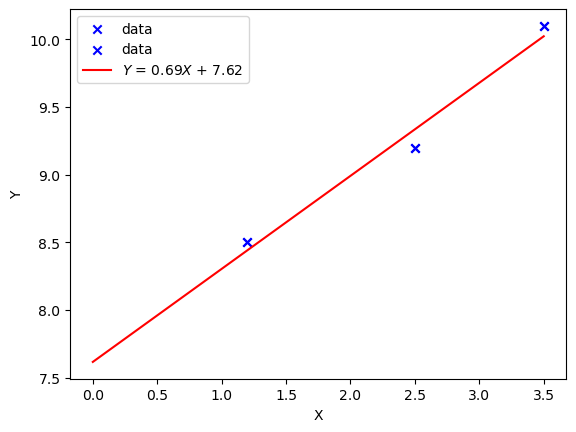

In [821]:
X = np.linspace(0, max(X), 100)
y = sigmoid(X, *popt)
plt.scatter(x, t,c='b',marker='x', label='data')
plt.plot(X,y, c='r',label="$Y$ = {}$X$ + {}".format(round(popt[0],2), round(popt[1],2)))
plt.legend(loc='best')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

----------------


<div dir="auto" >

<p style='text-align: right;'>
به سوالات زیر پاسخ دهید:
<p style='text-align: right;'>
A. برای تقسیم‌بندی داده به داده‌های train و test با نسبت دلخواه از چه ابزاری استفاده می‌کنید؟ (تابع آماده را نام ببرید یا پروسه‌ای که خودتان پیاده می‌کنید را توضیح دهید.)
<p style='text-align: right;'>
B. برای استاندارد کردن داده به ترتیبی که تمام feature‌ها دارای توزیع نرمال با میانگین 0 و انحراف معیار 1 باشند از چه ابزاری استفاده می‌کنید؟
<p style='text-align: right;'>
C. اگر داده‌ای که قصد ساختن مدل یادگیری ماشین روی آن را دارید دارای ستون‌هایی باشد که مقادیر از جنس عدد نباشند (مثلا str)، این ستون‌ها را چگونه به مقادیر عددی تبدیل می‌کنید؟
<p style='text-align: right;'>
D. مهم‌ترین تفاوت یادگیری نظارت شده و بدون ناظر چیست؟ برای هر کدام دو الگوریتم را نام ببرید.
<p style='text-align: right;'>
E. معیارهای accuracy و roc_auc برای طبقه‌بندی را توضیح دهید.
<p style='text-align: right;'>
F. معیارهای R2 score و root mean squared error را برای رگرسیون توضیح دهید. 
</p>
</div>


# A:

```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=4)
```

# B:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
```

# C:

```
#method 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['col_num'] = le.fit_transform(df['col_str'])

#method 2
df['col_name'] = df['col_name'].map({'Male':0, 'Female':1})
```

# D:

Supervised Learning:
- Linear Regression
- Decision Tree
- Random Forest Classifier

Unsupervised Learning:
- K-Means Clustering
- Principal Component Analysis (PCA)

# E:

```sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)```

Accuracy classification score.
In multilabel classification, this function computes subset accuracy: 
the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

```sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)```

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

# F:

## $R^2 = 1−\frac{\sum\limits_{i}^n[y_{i} - \hat{y_i}]^2}{\sum\limits_{i}^n[y_{i} - \bar{y}]^2}$
```sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)```

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a $(R^2)$ score of 0.0.

## $RMSE = \sqrt{\frac{1}{n}\sum\limits_{i}^n[y_{i} - \hat{y_i}]^2}$
```sklearn.metrics.root_mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')```

returns a non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.